In [1]:
## Install Wordcloud Library
!pip install wordcloud

In [2]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [8]:
#Load Data in Dataframe
df = pd.read_csv(r"F:\Documents\Downloads\winemag-data-small.csv", index_col = 0)

In [9]:
#Looking at first 5 rows of the dataset
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1.0,US,This tightly wound wine offers firm purple fru...,Marsh Estate Vineyard,90,50.0,Oregon,Willamette Valley,NaN,Paul Gregutt,@paulgwine,Roco 2015 Marsh Estate Vineyard Pinot Noir,Pinot Noir,Roco
2.0,France,The wine is initially soft and then begins to ...,Lieu-dit Les Epinats,87,NaN,Loire Valley,Saumur,NaN,Roger Voss,@vossroger,Cave de Saumur 2013 Lieu-dit Les Epinats (Sau...,Chenin Blanc,Cave de Saumur
3.0,US,"A rare find, this is a delightfully fun wine, ...",Noir de Noirs Old Vines,88,30.0,California,Sonoma County,Sonoma,Virginie Boone,@vboone,Wellington 2013 Noir de Noirs Old Vines Alican...,Alicante Bouschet,Wellington
4.0,Italy,"This sweet, Moscato-based offering would pair ...",Lounge,84,13.0,Veneto,Veneto,NaN,NaN,NaN,Astoria NV Lounge Moscato (Veneto),Moscato,Astoria
5.0,US,Full bodied and stuffed with fresh fruit flavo...,Honest,88,18.0,California,California,California Other,Jim Gordon,@gordone_cellars,The Federalist 2014 Honest Red (California),Red Blend,The Federalist


In [5]:
df[['country', 'description', 'points']].head()

,country,description,points
1.0,US,This tightly wound wine offers firm purple fru...,90
2.0,France,The wine is initially soft and then begins to ...,87
3.0,US,"A rare find, this is a delightfully fun wine, ...",88
4.0,Italy,"This sweet, Moscato-based offering would pair ...",84
5.0,US,Full bodied and stuffed with fresh fruit flavo...,88


In [14]:
#Group by country
country = df.groupby('country')

#Summary statistic of all countries
#country.describe()

In [12]:
#Building simple word cloud
df.description[55]

'This Chardonnay straddles the line between complexity and simplicity, with toasty orange and pineapple flavors brightened with citrusy acidity. Savory minerality adds interest and food friendliness.'

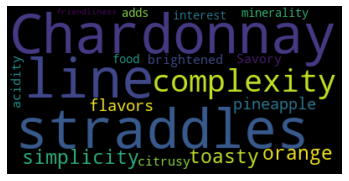

In [18]:
#Start with one review
text = df.description[55]

#Create and generate a word cloud image
wordcloud = WordCloud().generate(text)

#Display the generated image
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

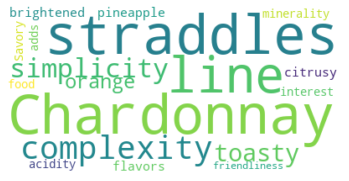

In [20]:
#Changing some optional arguments of the wordcloud like max_font_size, max_word and backround text

#Lower max_font_size, change the maximum number of word and lighten the background
wordcloud = WordCloud(max_font_size = 100, max_words = 20, background_color = 'white').generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [21]:
#Save the image in the img folder
wordcloud.to_file('first_review.png')

In [22]:
#Combining all the reviews
text = " ".join(review for review in df.variety)
print("There are {} words in the combination of all reviews".format(len(text)))

There are 126663 words in the combination of all reviews


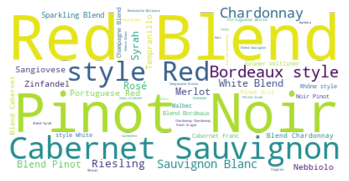

In [24]:
#Create stopword list
stopwords =  set(STOPWORDS)
stopwords.update(['drink', 'now', 'wine', 'flavor', 'flavors'])

#Generate a wordcloud image
wordcloud = WordCloud(mode = 'RGBA', max_font_size = 100, stopwords = stopwords, max_words = 50, 
                      background_color = None).generate(text)

#Display the generated image the matplotlib way
plt.imshow(wordcloud, interpolation = 'mitchell')
plt.axis('off')
plt.show()

In [25]:
?wordcloud